# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

columns = ['latitude','longitude','country']
data = []
data.append({'latitude': 33.751277,'longitude': -118.188740,'country':'Los Angeles'})
data.append({'latitude': 25.867736,'longitude': -80.324116,'country':'Miami'})
data.append({'latitude': 51.503016,'longitude': -0.075479,'country':'London'})
data.append({'latitude': 52.378894,'longitude': 4.885084,'country':'Amsterdam'})
data.append({'latitude': 39.366487,'longitude': 117.036146,'country':'Beijing'})
data.append({'latitude': -33.868457,'longitude': 151.205134,'country':'Sydney'})
#offices =  pd.DataFrame(data, columns = columns)
df = pd.read_csv('./data/checkins.csv.gz', na_values=' ?')
print(len(df))
print(df.head(5))
print(df.describe())

100000
    latitude   longitude
0  38.895112  -77.036366
1  33.800745  -84.410520
2  45.523452 -122.676207
3  40.764462 -111.904565
4  33.448377 -112.074037
            latitude      longitude
count  100000.000000  100000.000000
mean       36.886388     -89.396849
std         8.351517      35.579317
min       -45.031162    -159.670833
25%        33.494170    -112.074037
50%        38.646991     -87.743938
75%        40.740389     -75.163789
max        67.631479     174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [3]:
from sklearn.cluster import MeanShift

#~6 minute
%time meanShift = MeanShift(bandwidth=0.1, n_jobs=4).fit(df)
print(meanShift)

CPU times: user 44.6 s, sys: 6.82 s, total: 51.4 s
Wall time: 7min 56s
MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=4, seeds=None)


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

6


/home/arcades/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


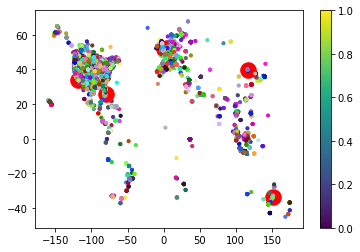

In [7]:
#print (meanShift.cluster_centers_)
fig = plt.figure()
ax = fig.add_subplot(111)

x = []
y = []

print(len(data))

for index in data:
    x.append(index['latitude'])
    y.append(index['longitude'])

scatter = ax.scatter(y,x,c='red',s=240)

number_of_colors = len(meanShift.cluster_centers_)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

df_color = []
for label in meanShift.labels_:
    df_color.append(color[label] )

ax.scatter(df['longitude'],df['latitude'],s=10,c=df_color)
    
plt.colorbar(scatter)
fig.show()


###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [5]:
from functools import reduce
from itertools import filterfalse

unique, counts = np.unique(meanShift.labels_, return_counts=True)
clasters = dict(zip(unique,counts))

true_clasters = list(filterfalse(lambda x: clasters[x] < 15,clasters))
#print(true_clasters)
print(len(true_clasters))

624


###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [6]:
from geopy.distance import geodesic

#use geodesic, because vincenty already deprecated and not work with some valid coordinates

offices_points = [(city['latitude'],city['longitude']) for city in data]

centers = [(meanShift.cluster_centers_[i][0],meanShift.cluster_centers_[i][1]) for i in true_clasters]
min = list()
epsilon = float(np.finfo(float).eps)
for center in centers:
    min_distance = geodesic(offices_points[0],center).miles
    for office in offices_points:
        distance = geodesic(office,center).miles
        #print(distance)
        if ((min_distance - distance) > float(epsilon)):
            min_distance = distance
    min.append([min_distance,center])
    
min.sort(key = lambda a: a[0])
for i in range(0,10):
    print('Point {1} with minimum distance {0} to nearest office\n'.format(min[i][0],min[i][1]))

Point (52.37296399032261, 4.892317222580647) with minimum distance 0.511664343451444 to nearest office

Point (-33.86063042857143, 151.20477592857145) with minimum distance 0.5398192612036046 to nearest office

Point (25.8456722642857, -80.31889059642857) with minimum distance 1.5533279019315598 to nearest office

Point (51.502991260887086, -0.12553728870967767) with minimum distance 2.159790544052752 to nearest office

Point (33.8098779552631, -118.14892380690813) with minimum distance 4.6436515628804536 to nearest office

Point (25.7858124199675, -80.2179380368254) with minimum distance 8.69267759169425 to nearest office

Point (25.705349721052592, -80.28342873815798) with minimum distance 11.462413168546155 to nearest office

Point (33.8883253427586, -118.04892817172427) with minimum distance 12.405938191898956 to nearest office

Point (26.010098249285683, -80.19999058571432) with minimum distance 12.47929704886396 to nearest office

Point (33.87298601157018, -118.36209114655645) wi

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 